In [12]:
import torch
from sklearn.model_selection import train_test_split

# load data from data folder(we"re in notebooks folder)
sim_arr_tensor = torch.load('./data/sim_arr_tensor.pt')

# train test split
train_data, test_data = train_test_split(
    sim_arr_tensor, test_size=0.2, random_state=42)
train_data, val_data = train_test_split(
    train_data, test_size=0.2, random_state=42)

/tmp/ipykernel_2375062/1126774367.py:5: FutureWarning:

You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.



In [13]:
from torch import nn

hyperparameters_dict = {
    "num_layers": 5,
    "poolsize": [2, 2, 2, 2, 5],
    "channels": [3, 12, 7, 7, 11, 12],
    "kernel_sizes": [15, 10, 14, 14, 14],
    "dilations": [5, 5, 3, 3, 1],
    "activations": [nn.SiLU, nn.Tanh, nn.Softplus, nn.SiLU, nn.SiLU],
    "lr": 0.0002568457560593339,
    "batch_size": 32,
    "beta" : 1.0,
    "n_clusters": 13
}

In [14]:
from cluster_acc import adj_rand_index
from lightning.pytorch.callbacks.early_stopping import EarlyStopping
import lightning as L
from torch.utils.data import DataLoader
from models import LitVAE

lit_model = LitVAE(hyperparameters=hyperparameters_dict)

# load pretrained weights for encoder and decoder
lit_model.model.encoder.load_state_dict(torch.load('./saved_models/encoder_weights.pt'), strict=False)
lit_model.model.decoder.load_state_dict(torch.load('./saved_models/decoder_weights.pt'))

trainer = L.Trainer(callbacks=[EarlyStopping(monitor="val_loss")])
trainer.fit(model=lit_model,
            train_dataloaders=DataLoader(train_data, batch_size=hyperparameters_dict["batch_size"], num_workers=31),
            val_dataloaders=DataLoader(val_data, batch_size=hyperparameters_dict["batch_size"], num_workers=31))

/tmp/ipykernel_2375062/459649970.py:10: FutureWarning:

You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.

/tmp/ipykernel_2375062/459649970.py:11: FutureWarning:

You are using `torch.load` with

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

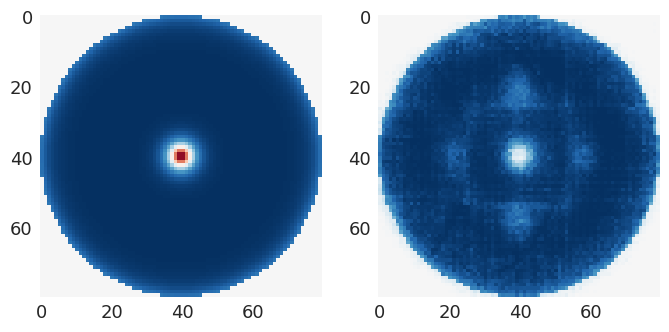

1_skyrmion


In [15]:
from plot import random_recon
random_recon(lit_model.model, test_data)

In [17]:
import optuna
from sklearn.cluster import HDBSCAN
from cluster_acc import purity, adj_rand_index
# refreah litVAE import
from models import LitVAE

# feature_array = lit_model.model.feature_array(sim_arr_tensor)

mu, _ = lit_model.model.encoder(sim_arr_tensor)
feature_array = mu.detach().numpy()
feature_array = (feature_array - feature_array.mean()
                         ) / feature_array.std()

def objective(trial):
    hdbscan_model = HDBSCAN(min_cluster_size=trial.suggest_int('min_cluster_size', 2, 10),
                            min_samples=trial.suggest_int('min_samples', 1, 1000),
                            cluster_selection_epsilon=trial.suggest_float('cluster_selection_epsilon', 0.0, 1.0),
                            allow_single_cluster=True)
    hdbscan_model.fit(feature_array)
    labels = hdbscan_model.labels_
    return adj_rand_index(labels)
    
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

print(study.best_params)

hdbscan_model = HDBSCAN(min_cluster_size=study.best_params['min_cluster_size'],
                        min_samples=study.best_params['min_samples'],
                        cluster_selection_epsilon=study.best_params['cluster_selection_epsilon'],
                        allow_single_cluster=True)
hdbscan_model.fit(feature_array)
labels = hdbscan_model.labels_
print(f'Purity: {purity(labels)}')
print(f'ARI: {adj_rand_index(labels)}')

[I 2024-08-29 10:04:12,384] A new study created in memory with name: no-name-f8b8849d-9b9b-4e3a-ad8a-ca5b4967f803
[I 2024-08-29 10:04:12,817] Trial 0 finished with value: 0.0 and parameters: {'min_cluster_size': 5, 'min_samples': 900, 'cluster_selection_epsilon': 0.10288162522542432}. Best is trial 0 with value: 0.0.
[I 2024-08-29 10:04:13,014] Trial 1 finished with value: 0.456114078960683 and parameters: {'min_cluster_size': 3, 'min_samples': 296, 'cluster_selection_epsilon': 0.36808623285393804}. Best is trial 1 with value: 0.456114078960683.
[I 2024-08-29 10:04:13,339] Trial 2 finished with value: 0.0 and parameters: {'min_cluster_size': 8, 'min_samples': 610, 'cluster_selection_epsilon': 0.1401020366224348}. Best is trial 1 with value: 0.456114078960683.
[I 2024-08-29 10:04:13,543] Trial 3 finished with value: 0.4481784116697675 and parameters: {'min_cluster_size': 10, 'min_samples': 309, 'cluster_selection_epsilon': 0.4613334694472353}. Best is trial 1 with value: 0.4561140789606

{'min_cluster_size': 10, 'min_samples': 51, 'cluster_selection_epsilon': 0.3329845315954014}
Purity: 0.7764119601328904
ARI: 0.5878502978785021


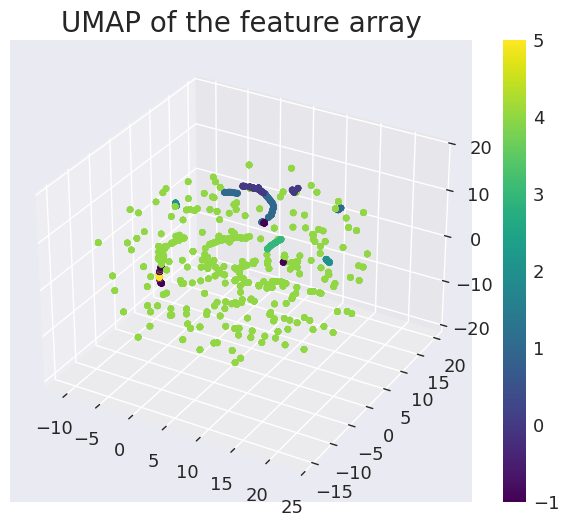

In [18]:
from plot import umap_plot
umap_plot(feature_array, labels)

In [19]:
from plot import class_config
class_config(labels)

Number of classes:  6


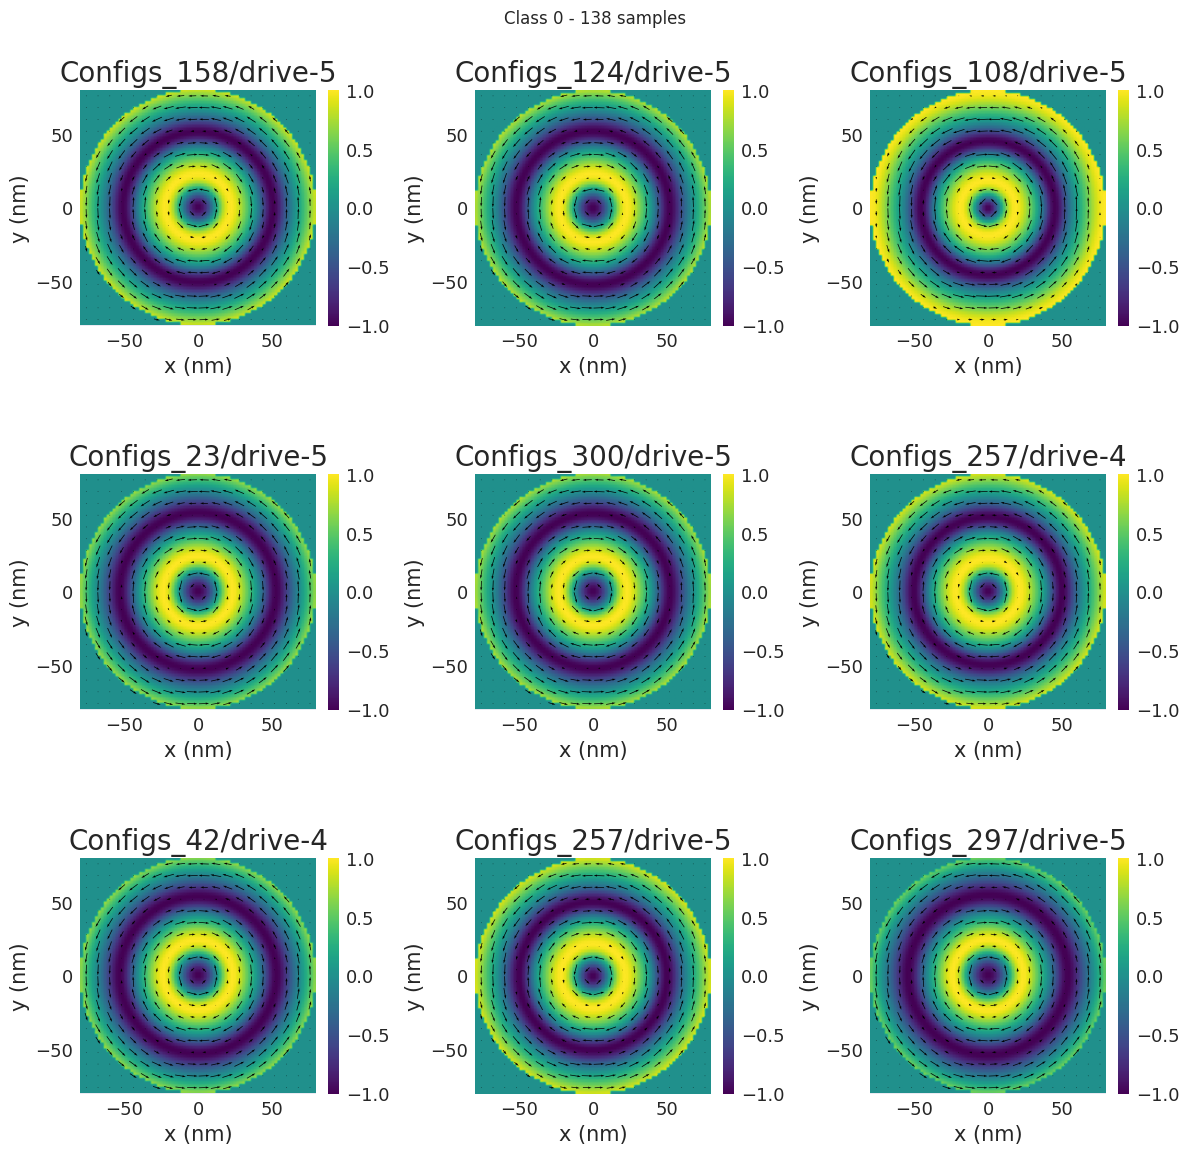

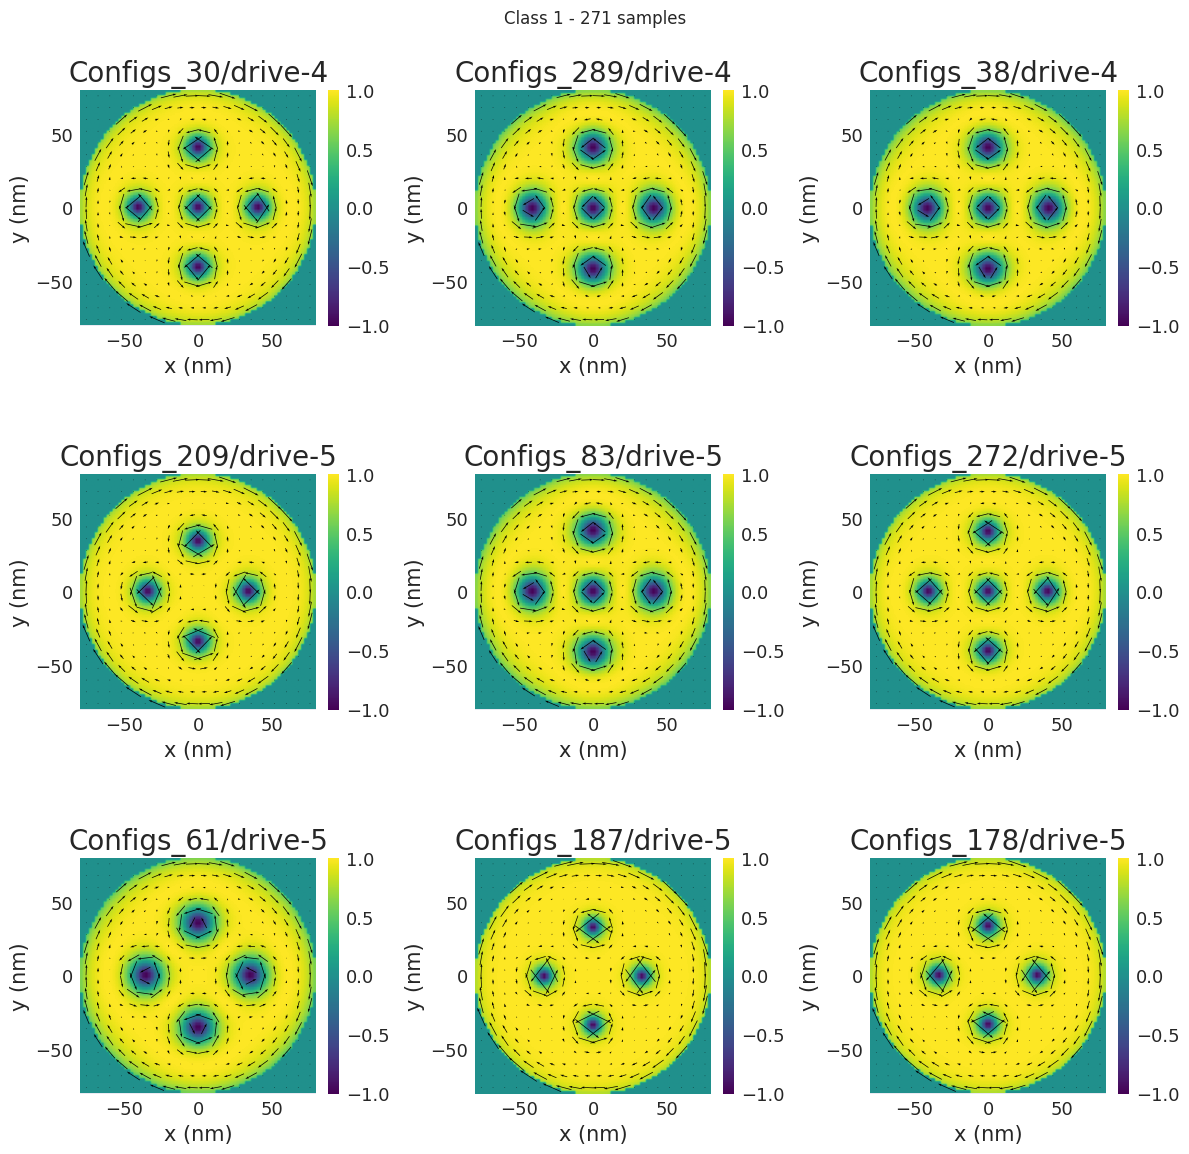

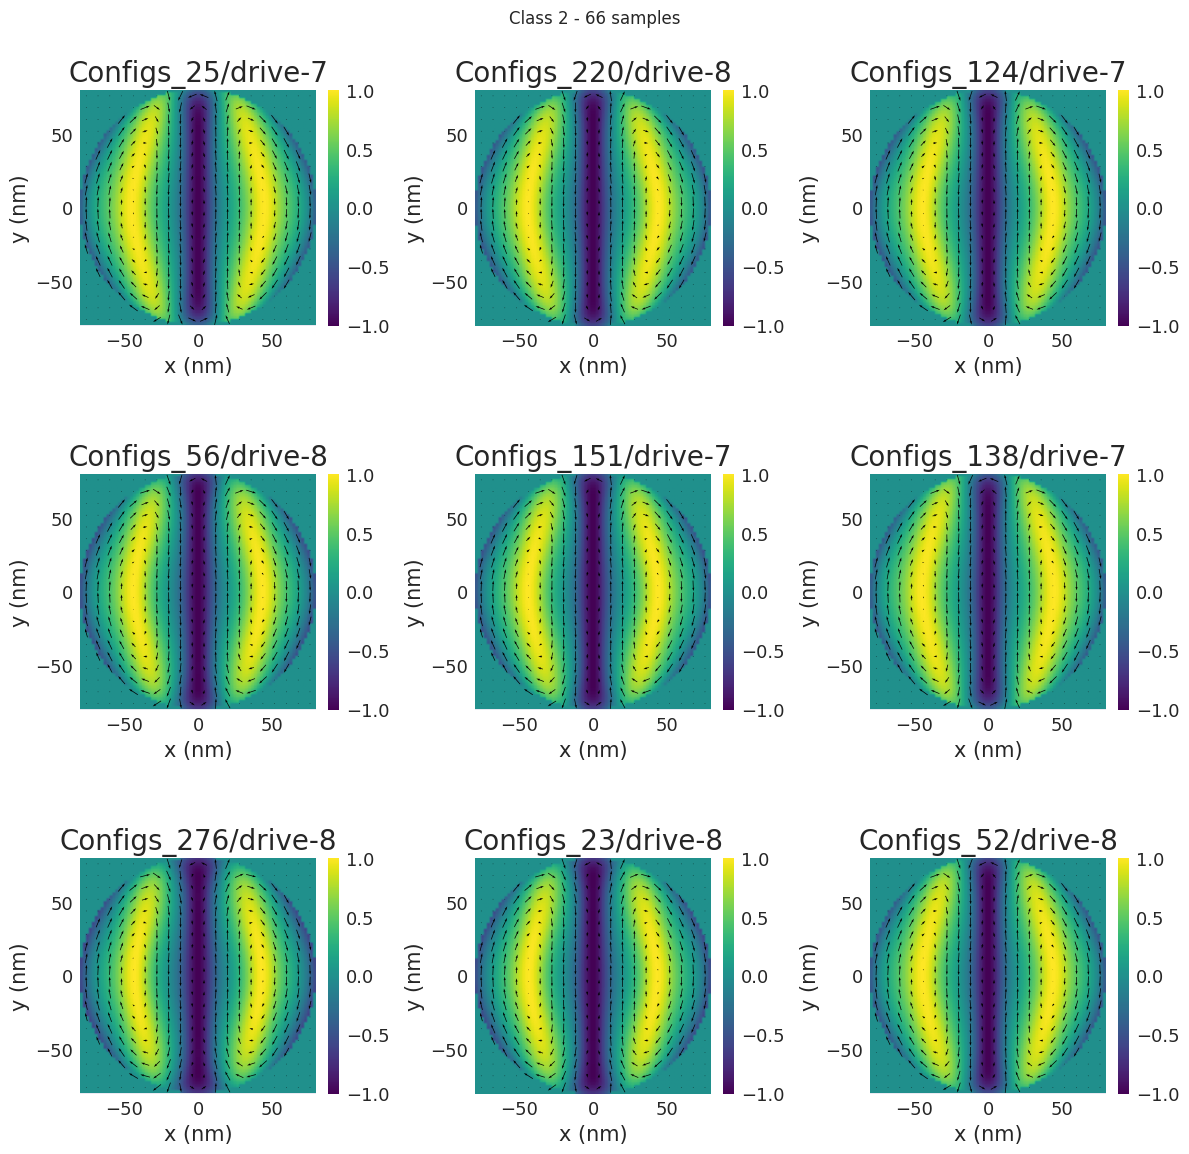

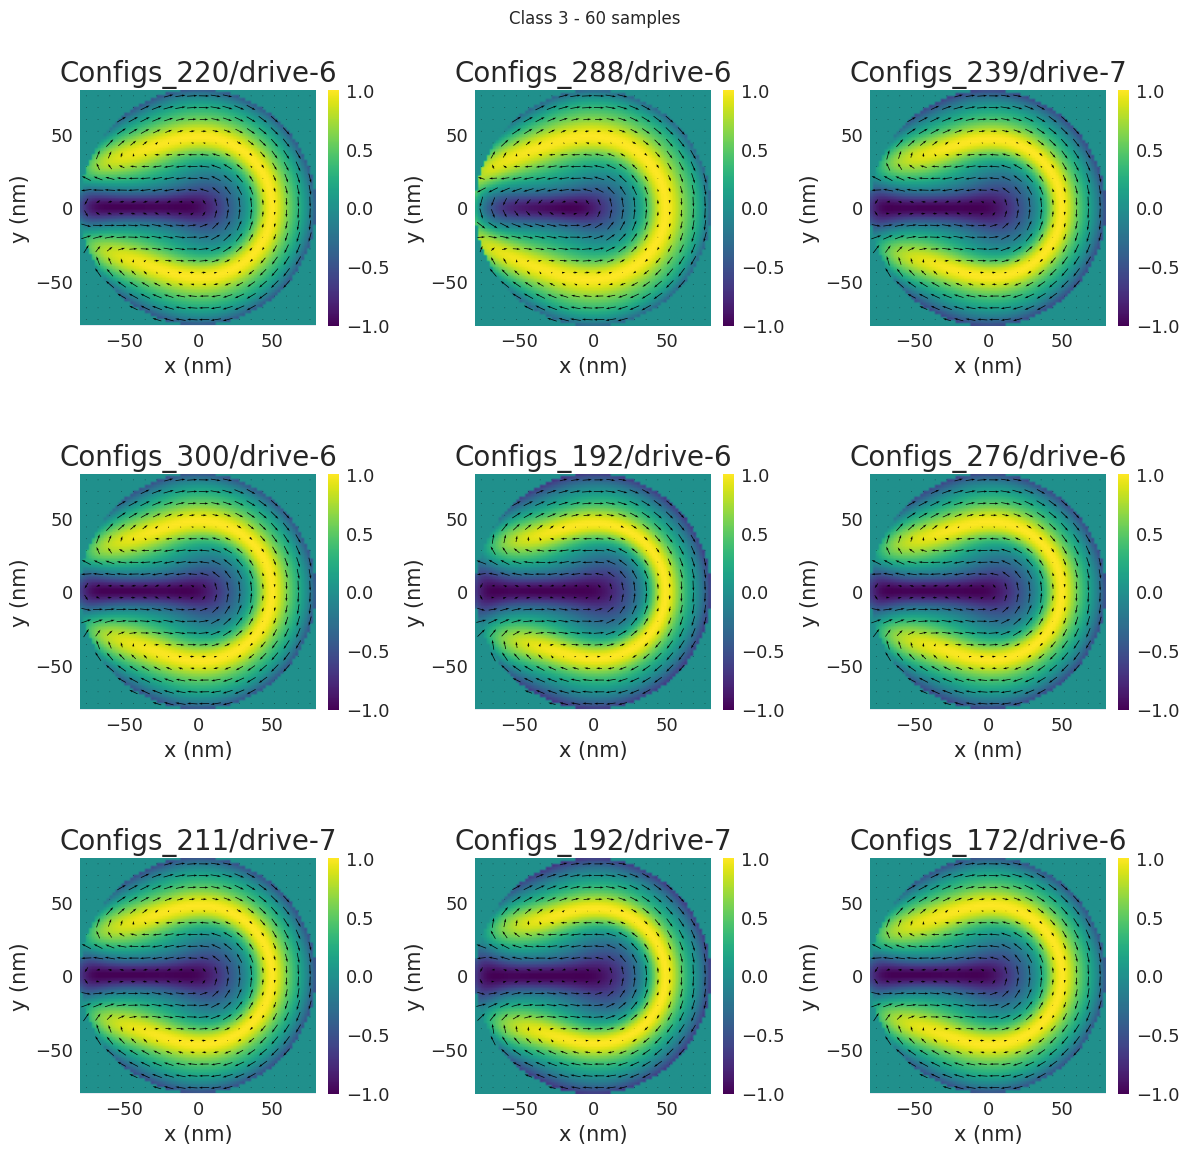

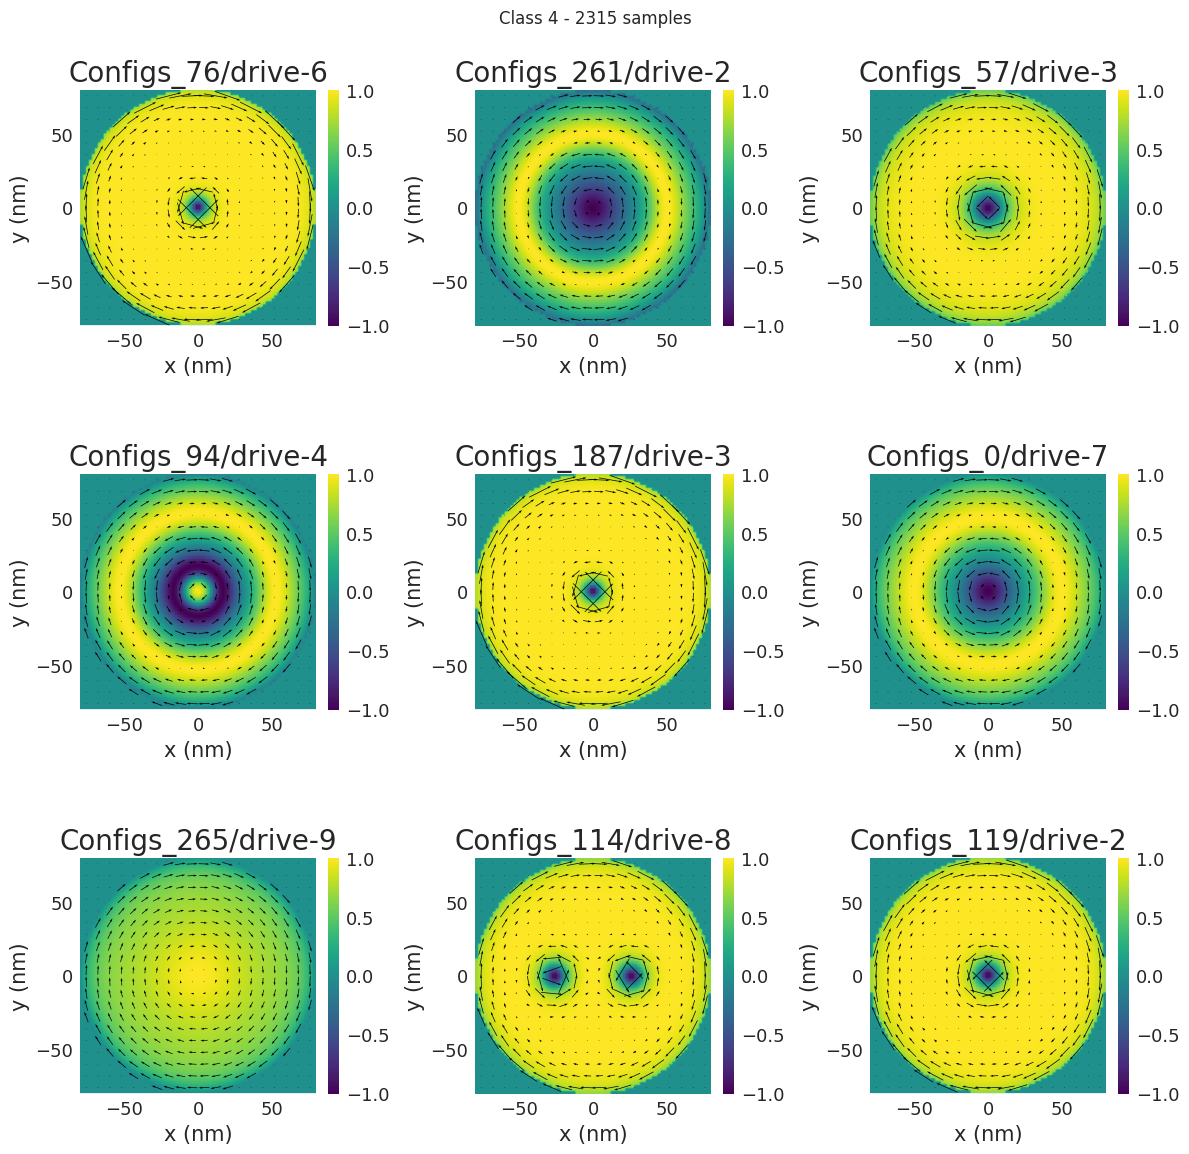

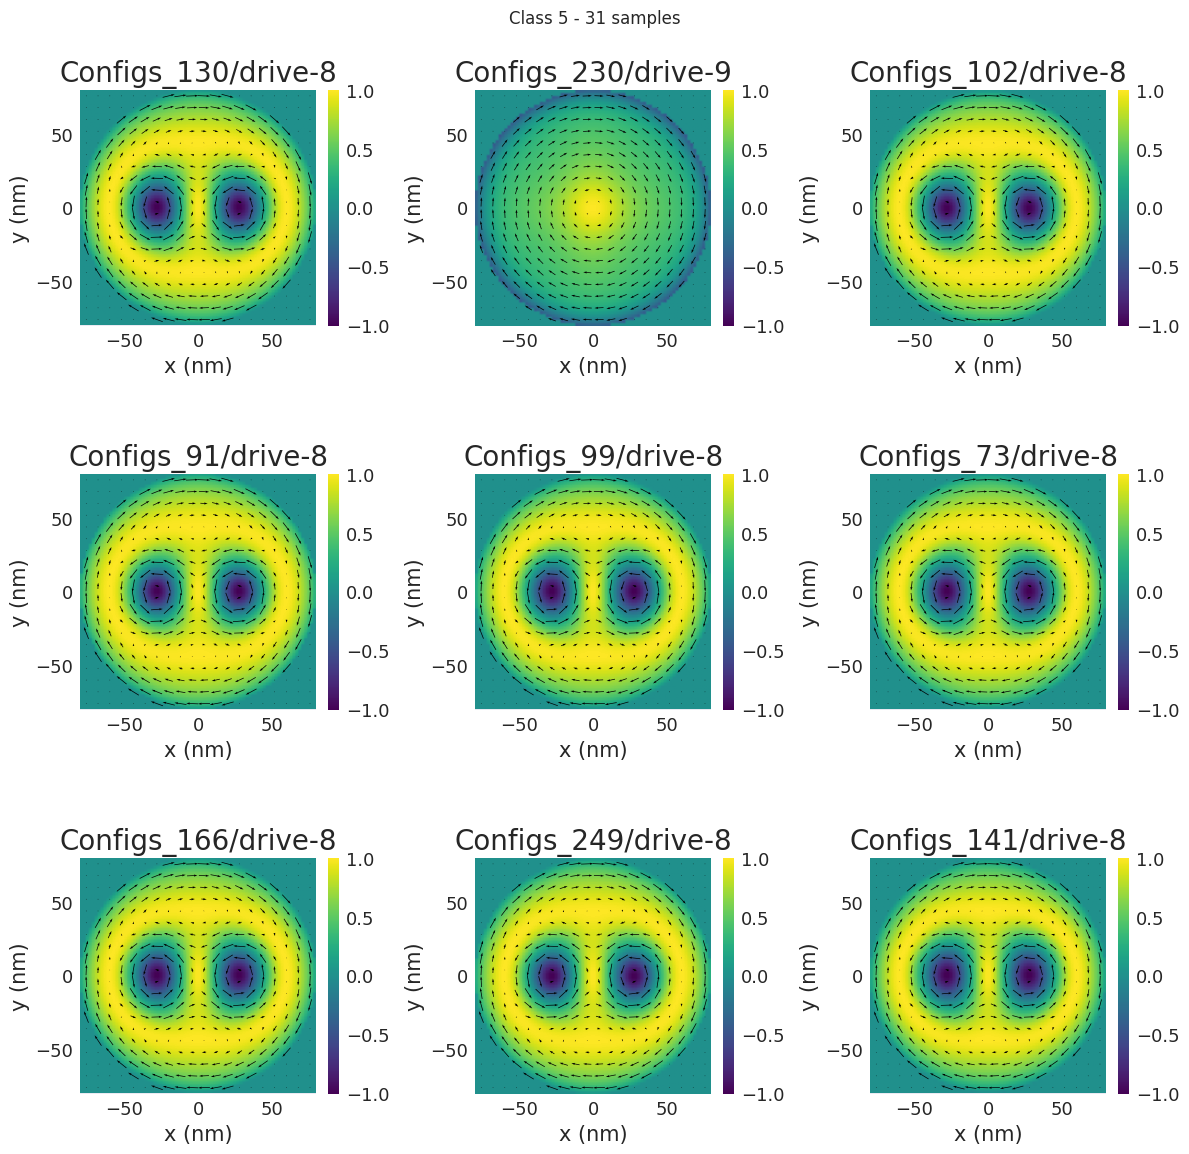

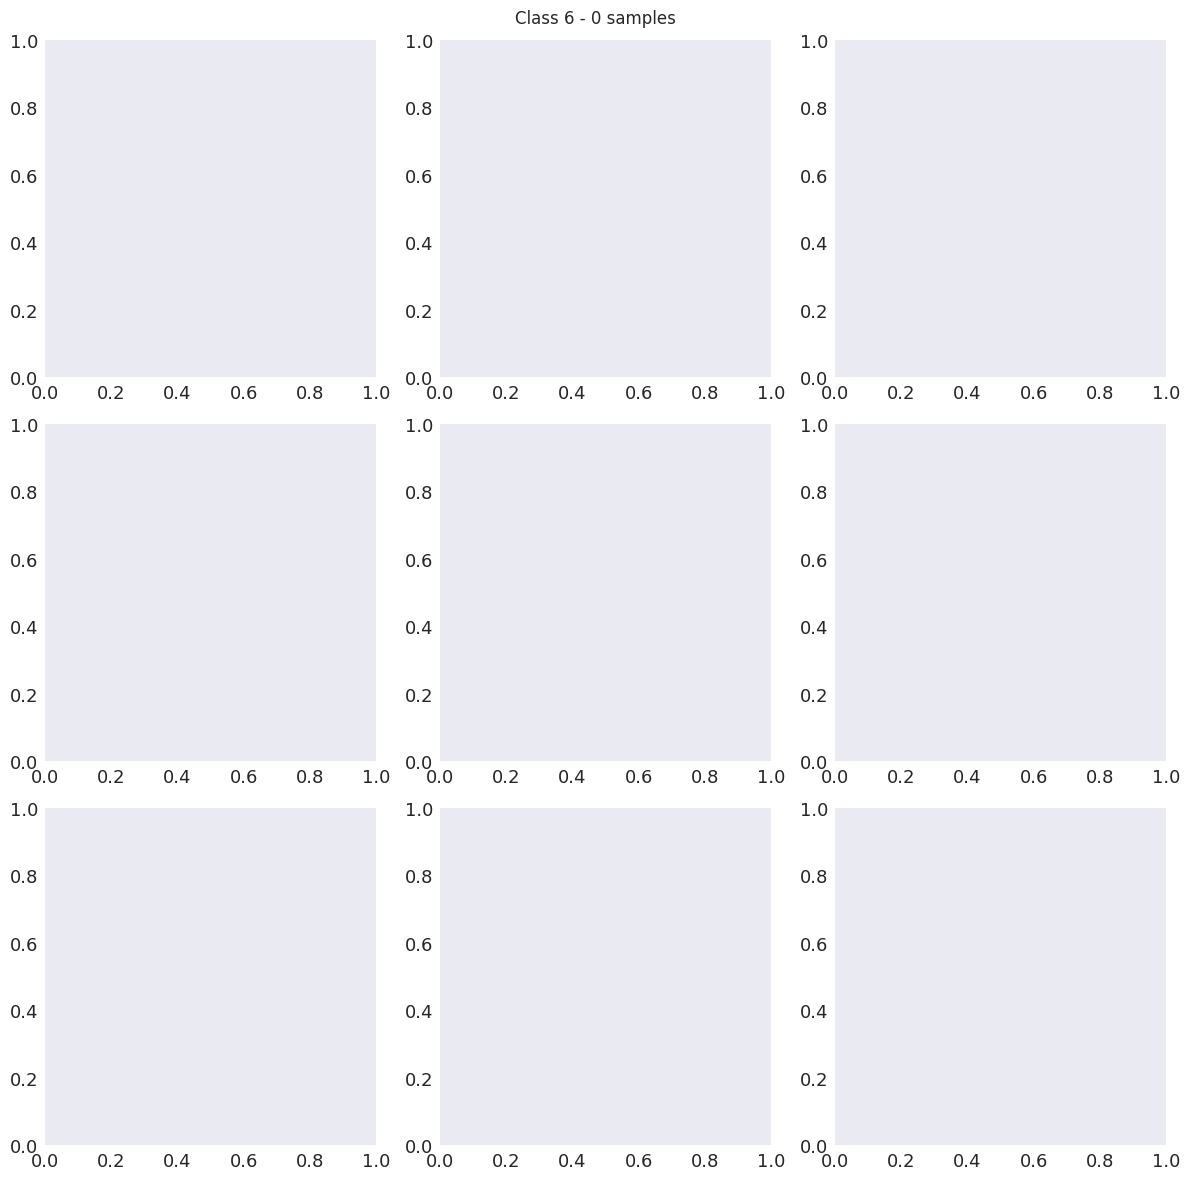

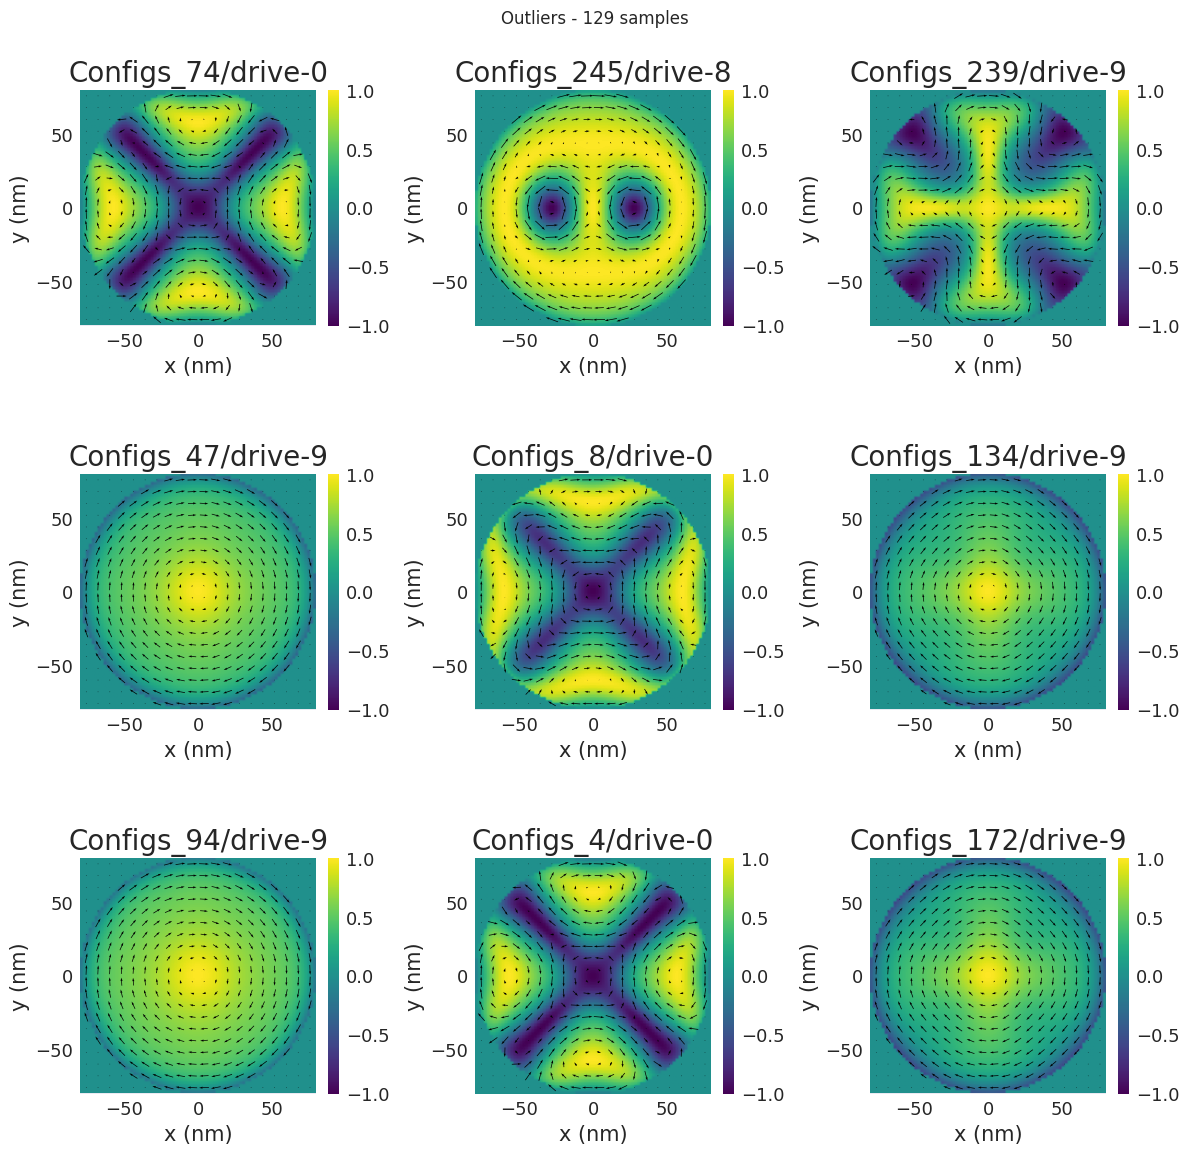

In [20]:
from plot import plot_all_examples
plot_all_examples(labels)